# Task
Для кожної компанії розуміння своїх доходів є дуже важливим щодо
вирахування ризиків, планування майбутніх інвестицій, визначення
маркетингових бюджетів і бюджетів на інфраструктуру. Усе це має прямий
вплив на те, скільки грошей у перспективі може принести продукт, і на
вашу привабливість для інвесторів. У холдингу Genesis кожна компанія від
самого заснування розвʼязує це питання, використовуючи різні
інструменти.

На чемпіонаті ваша команда спеціалістів Data Science має виконати
прогнозування доходів від користувачів. Крім цього, ваш CEO хотів би
також побачити робастну інтероперабельну модель, яка буде готова до
використання командою продукту та маркетингу.

## About
Дані, які ви будете використовувати, взяті з реального проєкту компанії —
мобільної гри для платформ iOS і Android. У ній ви можете знайти книги у
вигляді візуальних новел. Кожна містить у собі частини, де гравець має
робити вибір, що впливає на сюжет і кінцівку.

У грі є дві валюти, що можуть бути отримані за щоденні челенджі або
придбані за реальні гроші: кристали, які використовуються для відкриття
платних виборів у сюжеті, і тікети для відкриття наступних частин книги
(перша завжди є безплатною).

Крім того, користувач може придбати підписку, яка дає нескінченну
кількість ресурсів на певний час.

Для гравців, які цим не скористалися, на різних етапах гри може
транслюватися реклама, яка допомагає їх монетизувати

## Data
target_full_ltv_day30 є головною змінною в цій задачі та являє собою
сумарні доходи з користувача на тридцятий день його життя. Саме її ви
маєте прогнозувати, і саме по ній ми будемо оцінювати точність вашої
кінцевої моделі.

Крім змінної, вказаної вище, ви також отримаєте 3 додаткових, які в сумі
дорівнюють ключовій. Тобто target_full_ltv_day30 = target_sub_ltv_day30 +
target_iap_ltv_day30 + target_ad_ltv_day30, де
- target_sub_ltv_day30 – доходи з підписок;
- target_iap_ltv_day30 – доходи з покупки кристалів і тікетів;
- target_ad_ltv_day30 – доходи з реклами.
- total_sessions_day{N} – кумулятивна кількість сесій користувача на день N;
- chapters_finished_day{N} – кількість унікальних глав книги, які було закінчено за N днів;
- chapters_opened_day{N} – кількість унікальних глав, які було почато за N днів;
- chapters_closed_day{N} – кількість унікальних глав книги, які було закрито за N днів (закриття глави не означає її закінчення);
- diamonds_received_day{N} – кількість кристалів, які користувач купив або отримав за N днів;
- diamonds_spent_day{N} – кількість кристалів, які було витрачено за N днів;
- tickets_spent_day{N} – кількість тікетів, які було витрачено за N днів;
- retained_day{N} – булева змінна, означає повернення користувача в гру на день N;
- app_sub_ltv_day{N} – кумулятивні доходи з підписок на день N;
- app_iap_ltv_day{N} – кумулятивні доходи з купівлі кристалів або тікетів на день N;
- ad_ltv_day{N} – кумулятивні доходи з реклами на день N;
- chapters_finished_session{N} – кількість унікальних глав книги, які було закінчено за N сесій;
- chapters_opened_session{N} – кількість унікальних глав, які було відкрито за N сесій;
- chapters_closed_session{N} – кількість унікальних глав, які було закрито за N сесій;
- diamonds_spent_session{N} – кількість кристалів, які було витрачено за N сесій;
- tickets_spent_session{N} – кількість тікетів, які було витрачено за N сесій;
- media_source – закодоване джерело трафіку, з якого прийшов користувач (Facebook, Google тощо);
- install_date – дата встановлення гри;
- country_code – код країни з якої прийшов користувач;
- platform – платформа на яку була встановлена гра (iOS/Android).

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Швидко оглянеом наявні у нас колонки в датасеті.

In [5]:
# enable to plot every column
pd.set_option('display.max_columns', None)
df = pd.read_csv('TEST TASK (dataset).csv')
df

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,chapters_opened_day3,chapters_opened_day7,chapters_closed_day0,chapters_closed_day1,chapters_closed_day3,chapters_closed_day7,diamonds_received_day0,diamonds_received_day1,diamonds_received_day3,diamonds_received_day7,diamonds_spent_day0,diamonds_spent_day1,diamonds_spent_day3,diamonds_spent_day7,tickets_spent_day0,tickets_spent_day1,tickets_spent_day3,tickets_spent_day7,retained_day1,retained_day3,retained_day7,chapters_finished_session1,chapters_finished_session3,chapters_finished_session9,chapters_opened_session1,chapters_opened_session3,chapters_opened_session9,chapters_closed_session1,chapters_closed_session3,chapters_closed_session9,diamonds_spent_session1,diamonds_spent_session3,diamonds_spent_session9,tickets_spent_session1,tickets_spent_session3,tickets_spent_session9,app_sub_ltv_day0,app_sub_ltv_day1,app_sub_ltv_day3,app_iap_ltv_day0,app_iap_ltv_day1,app_iap_ltv_day3,media_source,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_23,2021-12-03,COUNTRY_135,0.000000,0.000000,0.000000,ios,0.000000,0.000000,0.000000,0.000000
1,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_2,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000
2,1.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_17,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000
3,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_23,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.000000,0.000000,0.000000,0.000000
4,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_1,2021-12-03,COUNTRY_203,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467827,11.0,11.0,11.0,11.0,9,9,9,9,10,10,10,10,3,3,3,3,282,282,282,282,254,254,254,254,7,7,7,7,0,0,0,1,1,8,2,2,9,0,0,3,29,29,237,1,1,6,0.0,0.0,0.00000,4.174198,4.174198,4.174198,SOURCE_17,2021-12-30,COUNTRY_141,0.037158,0.037158,0.037158,ios,0.000000,4.174198,0.037158,4.211356
1467828,2.0,3.0,6.0,7.0,5,9,11,13,6,10,12,13,0,0,0,0,346,554,658,732,254,542,658,721,5,9,11,12,1,1,0,3,9,13,4,10,13,0,0,0,174,542,721,3,9,12,0.0,0.0,1.17629,4.899572,7.841280,9.404430,SOURCE_23,2021-12-30,COUNTRY_141,0.039256,0.039256,0.091267,ios,4.705161,10.967580,0.091267,15.764008
1467829,3.0,5.0,11.0,13.0,5,9,15,18,5,10,16,19,0,0,0,0,265,497,857,913,254,496,809,901,4,8,13,16,1,1,0,0,5,13,1,5,14,0,0,0,0,254,685,0,4,12,0.0,0.0,0.00000,4.036153,8.875894,13.928170,SOURCE_23,2021-12-30,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.000000,14.938221,0.000000,14.938221
1467830,5.0,5.0,5.0,5.0,24,24,24,24,24,24,24,24,7,7,7,7,1308,1308,1308,1308,1278,1278,1278,1278,12,12,12,12,0,0,0,9,23,25,10,23,25,4,7,7,524,1249,1295,6,12,12,0.0,0.0,0.00000,7.402224,7.402224,7.402224,SOURCE_4,2021-12-30,COUNTRY_141,0.177550,0.177550,0.177550,ios,0.000000,7.402224,0.177550,7.579774


# EDA

## First look
Отже, при першому знайомстві із датасетом можемо спостерігати фічу 'install_date', хорошою практикою є розділити її на три окремі, що означатимуть рік, місяць та день відповідно. Також добавимо день тижня, в який відбулася інсталяція. При аналізі взаємозв'язків між даними оцінемо доцільність нашого рішення.

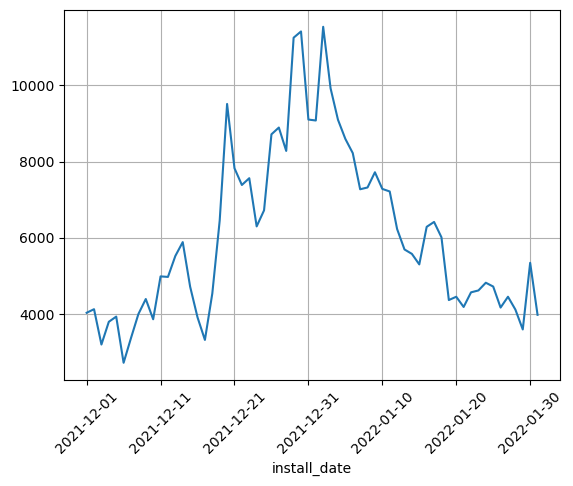

In [13]:
# plot ltv per day
df.groupby('install_date')['target_full_ltv_day30'].sum().plot(grid=True)
plt.xticks(rotation=45)
plt.show()

Бачимо, що дані надані нам за 2-ох місячний період. При чому вони припадають на новорічний період, що дає дуже не природній приріст, тобто у звичайний період, отримати такі ж результати мало ймовірно. Бачимо, що інформація, все-таки, може принести певну додаткову інформацію.

In [6]:
# adding some new date features
df['year'] = pd.to_datetime(df['install_date']).dt.strftime('%Y')
df['month'] = pd.to_datetime(df['install_date']).dt.strftime('%m')
df['day'] = pd.to_datetime(df['install_date']).dt.strftime('%d')
df['day_of_week'] = pd.to_datetime(df['install_date']).dt.strftime('%w')
df

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,chapters_opened_day3,chapters_opened_day7,chapters_closed_day0,chapters_closed_day1,chapters_closed_day3,chapters_closed_day7,diamonds_received_day0,diamonds_received_day1,diamonds_received_day3,diamonds_received_day7,diamonds_spent_day0,diamonds_spent_day1,diamonds_spent_day3,diamonds_spent_day7,tickets_spent_day0,tickets_spent_day1,tickets_spent_day3,tickets_spent_day7,retained_day1,retained_day3,retained_day7,chapters_finished_session1,chapters_finished_session3,chapters_finished_session9,chapters_opened_session1,chapters_opened_session3,chapters_opened_session9,chapters_closed_session1,chapters_closed_session3,chapters_closed_session9,diamonds_spent_session1,diamonds_spent_session3,diamonds_spent_session9,tickets_spent_session1,tickets_spent_session3,tickets_spent_session9,app_sub_ltv_day0,app_sub_ltv_day1,app_sub_ltv_day3,app_iap_ltv_day0,app_iap_ltv_day1,app_iap_ltv_day3,media_source,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30,year,month,day,day_of_week
0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_23,2021-12-03,COUNTRY_135,0.000000,0.000000,0.000000,ios,0.000000,0.000000,0.000000,0.000000,2021,12,03,5
1,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_2,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000,2021,12,03,5
2,1.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_17,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000,2021,12,03,5
3,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_23,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.000000,0.000000,0.000000,0.000000,2021,12,03,5
4,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_1,2021-12-03,COUNTRY_203,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000,2021,12,03,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467827,11.0,11.0,11.0,11.0,9,9,9,9,10,10,10,10,3,3,3,3,282,282,282,282,254,254,254,254,7,7,7,7,0,0,0,1,1,8,2,2,9,0,0,3,29,29,237,1,1,6,0.0,0.0,0.00000,4.174198,4.174198,4.174198,SOURCE_17,2021-12-30,COUNTRY_141,0.037158,0.037158,0.037158,ios,0.000000,4.174198,0.037158,4.211356,2021,12,30,4
1467828,2.0,3.0,6.0,7.0,5,9,11,13,6,10,12,13,0,0,0,0,346,554,658,732,254,542,658,721,5,9,11,12,1,1,0,3,9,13,4,10,13,0,0,0,174,542,721,3,9,12,0.0,0.0,1.17629,4.899572,7.841280,9.404430,SOURCE_23,2021-12-30,COUNTRY_141,0.039256,0.039256,0.091267,ios,4.705161,10.967580,0.091267,15.764008,2021,12,30,4
1467829,3.0,5.0,11.0,13.0,5,9,15,18,5,10,16,19,0,0,0,0,265,497,857,913,254,496,809,901,4,8,13,16,1,1,0,0,5,13,1,5,14,0,0,0,0,254,685,0,4,12,0.0,0.0,0.00000,4.036153,8.875894,13.928170,SOURCE_23,2021-12-30,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.000000,14.938221,0.000000,14.938221,2021,12,30,4
1467830,5.0,5.0,5.0,5.0,24,24,24,24,24,24,24,24,7,7,7,7,1308,1308,1308,1308,1278,1278,1278,1278,12,12,12,12,0,0,0,9,23,25,10,23,25,4,7,7,524,1249,1295,6,12,12,0.0,0.0,0.00000,7.402224,7.402224,7.402224,SOURCE_4,2021-12-30,COUNTRY_141,0.17

Оглянемо весь перелік фіч, який нам доступний.

In [4]:
df.columns

Index(['total_sessions_day0', 'total_sessions_day1', 'total_sessions_day3',
       'total_sessions_day7', 'chapters_finished_day0',
       'chapters_finished_day1', 'chapters_finished_day3',
       'chapters_finished_day7', 'chapters_opened_day0',
       'chapters_opened_day1', 'chapters_opened_day3', 'chapters_opened_day7',
       'chapters_closed_day0', 'chapters_closed_day1', 'chapters_closed_day3',
       'chapters_closed_day7', 'diamonds_received_day0',
       'diamonds_received_day1', 'diamonds_received_day3',
       'diamonds_received_day7', 'diamonds_spent_day0', 'diamonds_spent_day1',
       'diamonds_spent_day3', 'diamonds_spent_day7', 'tickets_spent_day0',
       'tickets_spent_day1', 'tickets_spent_day3', 'tickets_spent_day7',
       'retained_day1', 'retained_day3', 'retained_day7',
       'chapters_finished_session1', 'chapters_finished_session3',
       'chapters_finished_session9', 'chapters_opened_session1',
       'chapters_opened_session3', 'chapters_opened_session9'

Поверхнемо оглянемо властивості наших даних.

In [6]:
df.describe()

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,chapters_opened_day3,chapters_opened_day7,chapters_closed_day0,chapters_closed_day1,chapters_closed_day3,chapters_closed_day7,diamonds_received_day0,diamonds_received_day1,diamonds_received_day3,diamonds_received_day7,diamonds_spent_day0,diamonds_spent_day1,diamonds_spent_day3,diamonds_spent_day7,tickets_spent_day0,tickets_spent_day1,tickets_spent_day3,tickets_spent_day7,retained_day1,retained_day3,retained_day7,chapters_finished_session1,chapters_finished_session3,chapters_finished_session9,chapters_opened_session1,chapters_opened_session3,chapters_opened_session9,chapters_closed_session1,chapters_closed_session3,chapters_closed_session9,diamonds_spent_session1,diamonds_spent_session3,diamonds_spent_session9,tickets_spent_session1,tickets_spent_session3,tickets_spent_session9,app_sub_ltv_day0,app_sub_ltv_day1,app_sub_ltv_day3,app_iap_ltv_day0,app_iap_ltv_day1,app_iap_ltv_day3,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
count,1.466467e+06,1.466465e+06,1.466464e+06,1.466458e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06
mean,1.847298e+00,2.193912e+00,2.608979e+00,3.113484e+00,1.234763e+00,1.498150e+00,1.772233e+00,2.055170e+00,2.099693e+00,2.382293e+00,2.675983e+00,2.979698e+00,3.162876e-01,4.020065e-01,5.076535e-01,6.364141e-01,3.069434e+01,3.474102e+01,3.991870e+01,4.677508e+01,1.655125e+01,2.030832e+01,2.503722e+01,3.112081e+01,9.630435e-01,1.136264e+00,1.308151e+00,1.487670e+00,1.246342e-01,6.307874e-02,3.578134e-02,5.928226e-01,1.097223e+00,1.664425e+00,1.396173e+00,1.985727e+00,2.584895e+00,1.699227e-01,2.940044e-01,4.535103e-01,8.686160e+00,1.491066e+01,2.304735e+01,4.794002e-01,8.707461e-01,1.266305e+00,5.024392e-04,8.014407e-04,6.827862e-03,1.022759e-01,1.261447e-01,1.496395e-01,8.968177e-03,1.090574e-02,1.325368e-02,2.203037e-02,2.139268e-01,2.091572e-02,2.568728e-01
std,2.530825e+00,3.621980e+00,5.347342e+00,7.888102e+00,3.048333e+00,3.975010e+00,5.033945e+00,6.325564e+00,3.117375e+00,4.077269e+00,5.179782e+00,6.533634e+00,1.011521e+00,1.442274e+00,1.977516e+00,2.721822e+00,1.378656e+02,1.498730e+02,1.748671e+02,2.020068e+02,5.702001e+01,7.822297e+01,1.022019e+02,1.368328e+02,2.302796e+00,2.878193e+00,3.461918e+00,4.211442e+00,3.303037e-01,2.431046e-01,1.857446e-01,1.556414e+00,2.576963e+00,4.135928e+00,1.708081e+00,2.694012e+00,4.284710e+00,6.616408e-01,9.769367e-01,1.523384e+00,2.662829e+01,4.647253e+01,7.952051e+01,1.213788e+00,1.970211e+00,2.994545e+00,1.825943e-02,6.095244e-02,1.286399e-01,7.672101e-01,9.683484e-01,1.176394e+00,4.453546e-02,6.009280e-02,7.472105e-02,3.088758e-01,2.097916e+00,1.601929e-01,2.274466e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.550000e+02,-9.550000e+02,-9.550000e+02,0.000000e+00,-7.000000e+00,-7.000000e+00,-7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000

Як бачимо нашим даним притаманний приріст значень після 80-того пронцентиля, що може свідчити про експоненційний характер розподілу наших фіч, яке потребує подальшого вивчення та можливого нормалізування для навчанння моделі.

In [7]:
pd.set_option('display.max_columns', 20)
df.describe(include='O')

,media_source,install_date,country_code,platform,year,month,day,day_of_week
count,1467832,1467832,1467832,1467832,1467832,1467832,1467832,1467832
unique,24,62,224,2,2,2,31,7
top,SOURCE_4,2021-12-30,COUNTRY_141,android,2021,12,30,4
freq,728958,94101,387761,887426,892151,892151,106140,232676


Робимо висновки, що SOURCE_4 приносить половину користувачів, більша половина користувачів є Android users. Country_code потребує більшого аналізу.

<AxesSubplot:xlabel='Kurtosis', ylabel='Density'>

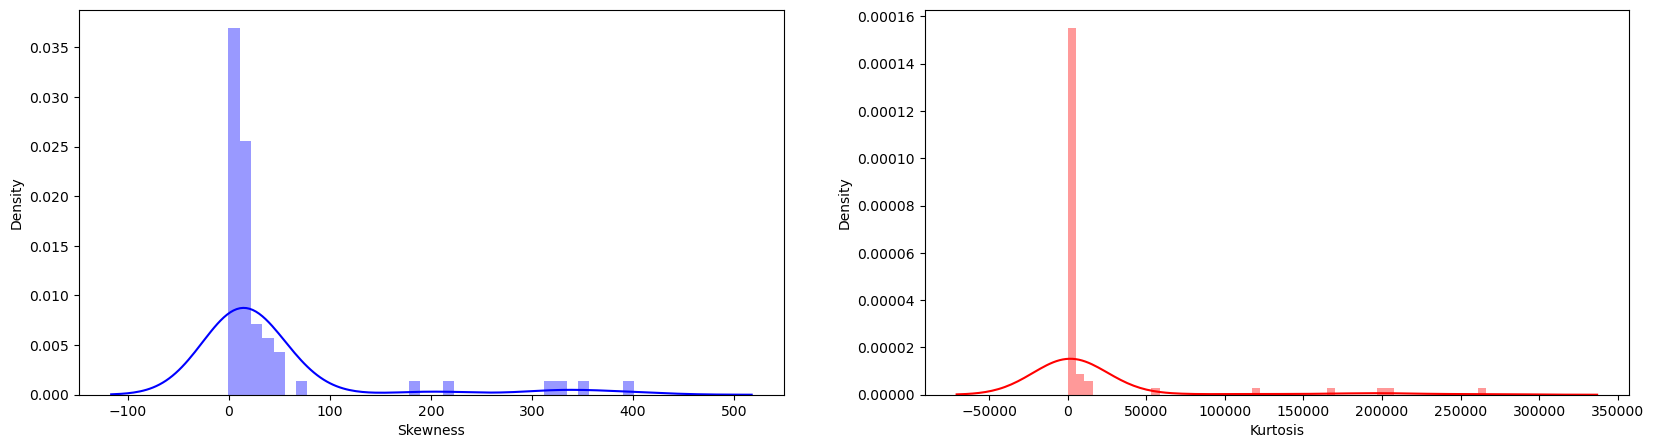

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
# plot skewness and kurtness of our features
sns.distplot(df.skew(), color='blue', axlabel ='Skewness', ax=ax1)
sns.distplot(df.kurt(), color='r', axlabel ='Kurtosis', norm_hist= False, kde = True, rug = False, ax=ax2)

Бачимо, що у більшості свої наші фічі мають тенденцію до позитивної асиметрії та ексцесу, що наштовхує на думку про їх експоненціальний характер. 

<b>Висновки:</b>
- дані представлені за новорічний період, 2 місяці, спостерігаємо пік
- категоріальні фічі ймовірно містять цікаві інсайди та потребують детальнішого аналізу
- фічі мають тенденцію експоненціального або пуассонівського характеру

## Target

Дослідимо таргет, його розподіл та основні залежності доходу.

<AxesSubplot:xlabel='target_full_ltv_day30', ylabel='Density'>

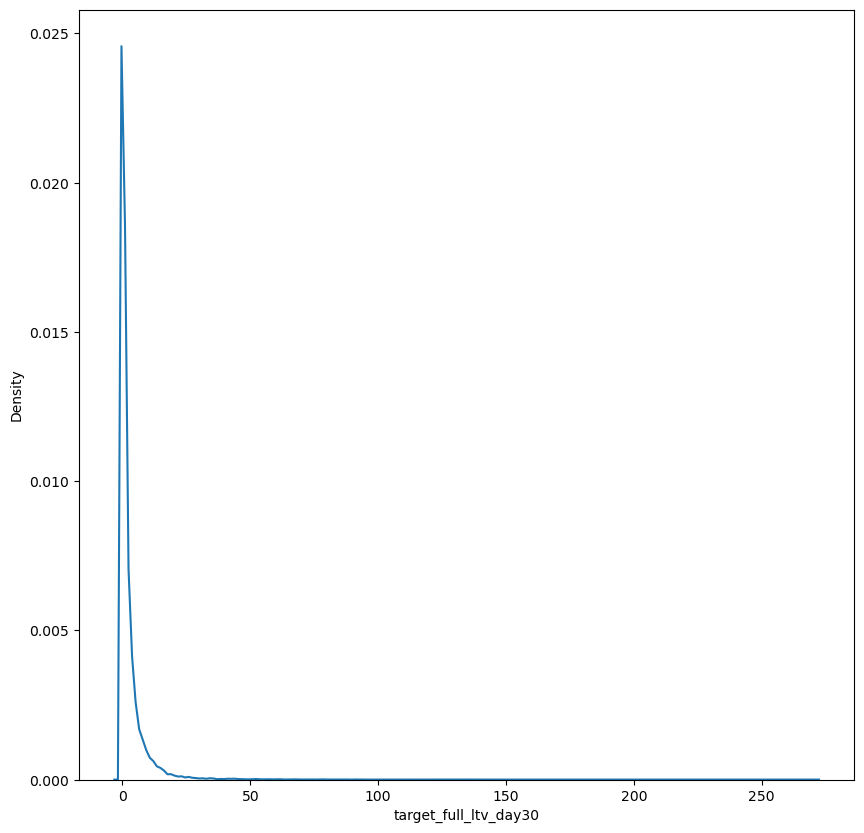

In [15]:
plt.figure(figsize=(10, 10))
# plot target distribution
sns.kdeplot(df['target_full_ltv_day30'])

Бачимо, що наша величина, яка означає сумарний дохід від користувача на 30 день користування додотком, має кілька від'ємних прикладів, що явно є викидами (позбудемося їх). В результаті отрмаємо неперервну випадкову величену, розподілено за екпоненціальний законом.

In [7]:
# plot target quantiles
df = df[df['target_full_ltv_day30'] >= 0]
df['target_full_ltv_day30'].describe([0.75, 0.8, 0.85, 0.9, 0.95, 0.99])

count    1.467831e+06
mean     2.568749e-01
std      2.274465e+00
min      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
80%      2.019713e-03
85%      1.311969e-02
90%      4.522642e-02
95%      5.122285e-01
99%      6.620580e+00
max      2.720042e+02
Name: target_full_ltv_day30, dtype: float64

Бачимо, що якийсь помітний дохід приносять тільки 2-3% користуваів. Давайте розгялнемо, які когорти приносять найбільше доходу.

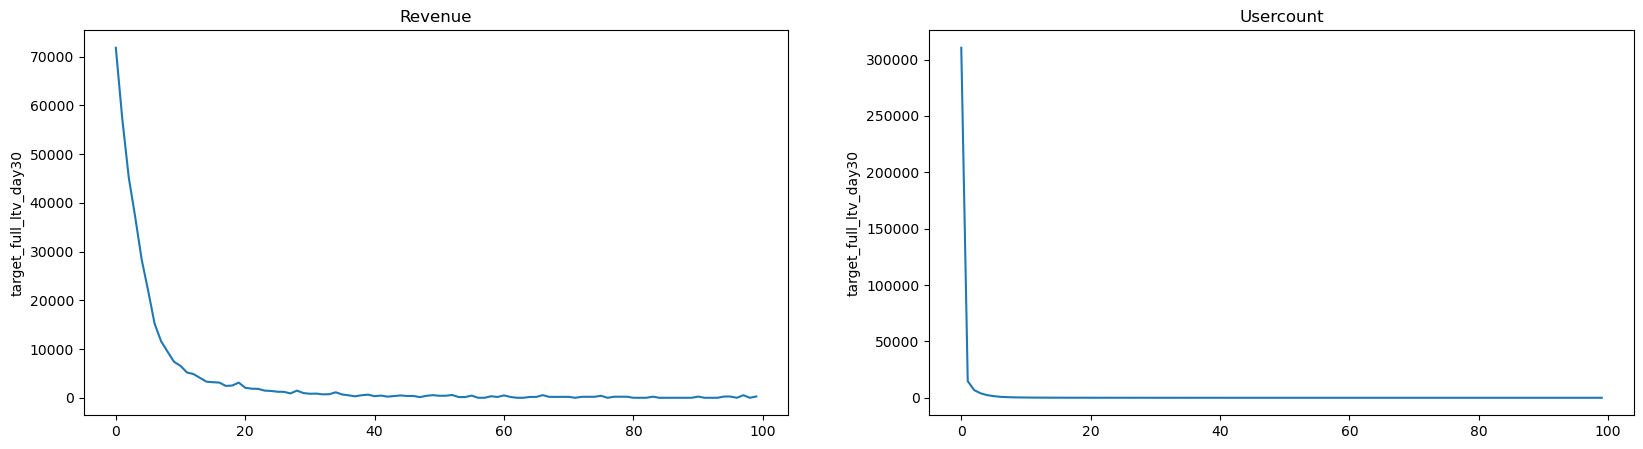

In [146]:
revenue = df[df['target_full_ltv_day30'] > 0]['target_full_ltv_day30']
df['bins'] = pd.cut(revenue, 100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
# plot target ltv sum per bin
sns.lineplot(x=np.arange(100), y=df.groupby('bins')['target_full_ltv_day30'].sum(), ax=ax1)
ax1.title.set_text('Revenue')
# plot targetv usercount per bin
sns.lineplot(x=np.arange(100), y=df.groupby('bins')['target_full_ltv_day30'].count(), ax=ax2)
ax2.ticklabel_format(style='plain')
ax2.title.set_text('Usercount')

Як виявляється, основний прибуток додатку приносять користувачі, що поодному вносять малу користь, проте своїм число (переважна більшість користувачів) у сумі складають головну масу доходу. Кількість користувачів експоненційно зменшується і зростом їх грошових витрат на ігру (зменшується кількість користувачів, якщо збільшується чек). Те саме із прибутком, чим вищий рівень зацікавленості, тим менше людей і цій групі, тим менше доходу вони приносять, як гурпа, відносно інших груп (якщо вимірювати група як інтервал в межаї якого знаходиться їх LTV).

Спробуємо перегрупувати наш датасет так, щоб змогти вивсети структуру нашого доходу, яка, як зазначалося, складається із 3 компонентів.

In [8]:
df_melt = df.melt(value_vars=['target_sub_ltv_day30', 'target_iap_ltv_day30', 'target_ad_ltv_day30', 'target_full_ltv_day30'], id_vars=['media_source', 'country_code', 'platform'])
df_melt

,media_source,country_code,platform,variable,value
0,SOURCE_23,COUNTRY_135,ios,target_sub_ltv_day30,0.000000
1,SOURCE_2,COUNTRY_141,android,target_sub_ltv_day30,0.000000
2,SOURCE_17,COUNTRY_141,android,target_sub_ltv_day30,0.000000
3,SOURCE_23,COUNTRY_141,ios,target_sub_ltv_day30,0.000000
4,SOURCE_1,COUNTRY_203,android,target_sub_ltv_day30,0.000000
...,...,...,...,...,...
5865823,SOURCE_17,COUNTRY_141,ios,target_full_ltv_day30,4.211356
5865824,SOURCE_23,COUNTRY_141,ios,target_full_ltv_day30,15.764008
5865825,SOURCE_23,COUNTRY_141,ios,target_full_ltv_day30,14.938221
5865826,SOURCE_4,COUNTRY_141,ios,target_full_ltv_day30,7.579774


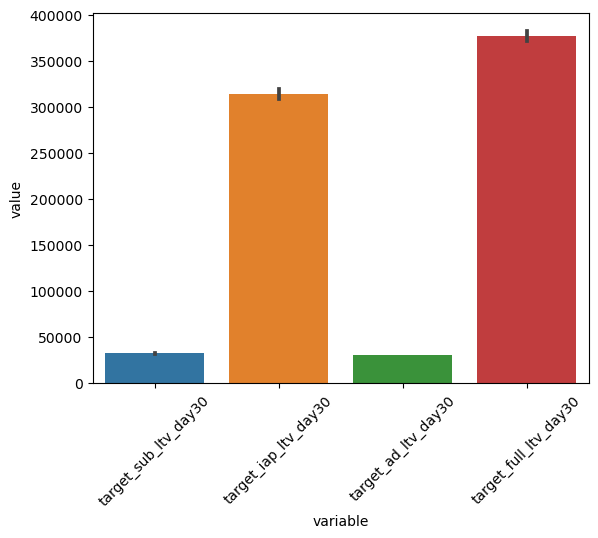

In [9]:
sns.barplot(df_melt, x='variable', y='value', estimator='sum')
plt.xticks(rotation=45)
plt.show()

Як бачимо головну частину доходу складає саме внутрішньо-продуктові витрати. Мало користувачів користуються послугами підписки.

<b>Висновки:</b>
- таргет розподілений за експоненціальним законом
- є від'ємні значення, що може вважатися як викиди, або повернення кошті, трапляється надзвичайно рідко
- тільки 2-3% користувачів приносять значимі суми, 75% взагалі нічого неприносять
- головний дохід складається із великої кількості користувачів, що по одному принесли не великі кошти.
- внутрішні витрати формують основну масу доходу

## Missing values

Оглянемо, яка частина данних є загубленною.

In [5]:
# show number of NA in each column
df.isna().sum()

total_sessions_day0       1365
total_sessions_day1       1367
total_sessions_day3       1368
total_sessions_day7       1374
chapters_finished_day0       0
                          ... 
target_full_ltv_day30        0
year                         0
month                        0
day                          0
day_of_week                  0
Length: 67, dtype: int64

Як бачимо тільки група фіч total_session має незначну кількість втрачених даних, давайте дослідимо їх детальніше.

In [8]:
# show rows with NA
df[df.isna().any(axis=1)].sort_values('target_full_ltv_day30').tail(15)

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30,year,month,day,day_of_week
40607,NaN,NaN,NaN,NaN,3,3,3,3,4,4,...,0.078295,ios,0.150615,1.518320,0.078295,1.747230,2021,12,01,3
160329,NaN,NaN,NaN,NaN,2,2,2,2,2,2,...,0.000000,ios,0.000000,1.790639,0.000000,1.790639,2022,01,26,3
40609,NaN,NaN,NaN,NaN,1,1,1,1,2,2,...,0.000000,ios,0.000000,1.870383,0.000000,1.870383,2021,12,01,3
13277,NaN,NaN,NaN,NaN,1,1,1,1,2,2,...,0.000000,ios,1.913692,0.000000,0.000000,1.913692,2021,12,02,4
86195,NaN,NaN,NaN,NaN,2,2,2,2,3,3,...,0.000000,ios,0.000000,2.039836,0.000000,2.039836,2021,12,11,6
680403,NaN,NaN,NaN,NaN,0,0,0,0,1,1,...,0.000000,ios,2.052116,0.000000,0.000000,2.052116,2021,12,22,3
959886,NaN,NaN,NaN,NaN,2,2,2,2,2,2,...,0.000000,ios,0.968619,1.128707,0.000000,2.097326,2021,12,23,4
667216,NaN,NaN,NaN,NaN,1,1,1,1,2,2,...,0.000000,ios,0.000000,2.172787,0.000000,2.172787,2022,01,12,3
279580,NaN,NaN,NaN,NaN,1,1,1,1,2,2,...,0.000000,ios,2.013652,0.838742,0.000000,2.852394,2022,01,19,3
13347,NaN,NaN,NaN,NaN,3,3,3,3,4,4,...,0.081337,ios,0.171250,2.759025,0.081337,3.011612,2021,12,02,4


In [17]:
# quantiles for data with NA
df[df.isna().any(axis=1)]['target_full_ltv_day30'].describe([0.75, 0.9, 0.95])

count    1374.000000
mean        0.058955
std         0.410302
min         0.000000
50%         0.000000
75%         0.000000
90%         0.015142
95%         0.067544
max         7.934691
Name: target_full_ltv_day30, dtype: float64

Ця вибірка даних є цілком репризентативною так, як в цілому у вибірці також 75% юзерів не приносять дохід, 23% - приносять не значний дохід та тільки приблизно 2% юзер складають основну частку доходу. Отож ми можемо безпечно вилучити рядки із пропущеними значеннями із датасету. Вони не мають значних відмінностей від всіх даних та не несуть якоїсь ексклюзивності.

In [8]:
# remove rows with NA
df = df.dropna()
df

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,chapters_opened_day3,chapters_opened_day7,chapters_closed_day0,chapters_closed_day1,chapters_closed_day3,chapters_closed_day7,diamonds_received_day0,diamonds_received_day1,diamonds_received_day3,diamonds_received_day7,diamonds_spent_day0,diamonds_spent_day1,diamonds_spent_day3,diamonds_spent_day7,tickets_spent_day0,tickets_spent_day1,tickets_spent_day3,tickets_spent_day7,retained_day1,retained_day3,retained_day7,chapters_finished_session1,chapters_finished_session3,chapters_finished_session9,chapters_opened_session1,chapters_opened_session3,chapters_opened_session9,chapters_closed_session1,chapters_closed_session3,chapters_closed_session9,diamonds_spent_session1,diamonds_spent_session3,diamonds_spent_session9,tickets_spent_session1,tickets_spent_session3,tickets_spent_session9,app_sub_ltv_day0,app_sub_ltv_day1,app_sub_ltv_day3,app_iap_ltv_day0,app_iap_ltv_day1,app_iap_ltv_day3,media_source,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30,year,month,day,day_of_week
0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_23,2021-12-03,COUNTRY_135,0.000000,0.000000,0.000000,ios,0.000000,0.000000,0.000000,0.000000,2021,12,03,5
1,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_2,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000,2021,12,03,5
2,1.0,2.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_17,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000,2021,12,03,5
3,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_23,2021-12-03,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.000000,0.000000,0.000000,0.000000,2021,12,03,5
4,1.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,SOURCE_1,2021-12-03,COUNTRY_203,0.000000,0.000000,0.000000,android,0.000000,0.000000,0.000000,0.000000,2021,12,03,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467827,11.0,11.0,11.0,11.0,9,9,9,9,10,10,10,10,3,3,3,3,282,282,282,282,254,254,254,254,7,7,7,7,0,0,0,1,1,8,2,2,9,0,0,3,29,29,237,1,1,6,0.0,0.0,0.00000,4.174198,4.174198,4.174198,SOURCE_17,2021-12-30,COUNTRY_141,0.037158,0.037158,0.037158,ios,0.000000,4.174198,0.037158,4.211356,2021,12,30,4
1467828,2.0,3.0,6.0,7.0,5,9,11,13,6,10,12,13,0,0,0,0,346,554,658,732,254,542,658,721,5,9,11,12,1,1,0,3,9,13,4,10,13,0,0,0,174,542,721,3,9,12,0.0,0.0,1.17629,4.899572,7.841280,9.404430,SOURCE_23,2021-12-30,COUNTRY_141,0.039256,0.039256,0.091267,ios,4.705161,10.967580,0.091267,15.764008,2021,12,30,4
1467829,3.0,5.0,11.0,13.0,5,9,15,18,5,10,16,19,0,0,0,0,265,497,857,913,254,496,809,901,4,8,13,16,1,1,0,0,5,13,1,5,14,0,0,0,0,254,685,0,4,12,0.0,0.0,0.00000,4.036153,8.875894,13.928170,SOURCE_23,2021-12-30,COUNTRY_141,0.000000,0.000000,0.000000,ios,0.000000,14.938221,0.000000,14.938221,2021,12,30,4
1467830,5.0,5.0,5.0,5.0,24,24,24,24,24,24,24,24,7,7,7,7,1308,1308,1308,1308,1278,1278,1278,1278,12,12,12,12,0,0,0,9,23,25,10,23,25,4,7,7,524,1249,1295,6,12,12,0.0,0.0,0.00000,7.402224,7.402224,7.402224,SOURCE_4,2021-12-30,COUNTRY_141,0.17

<b>Висновки:</b> вплив втрачених даних на датасет не є значним.

## Correlation analysis

На цьому етапі спробуємо побудувати корреляційну матрицю всіх фіч та знайти інсайди для подальшого аналізу.

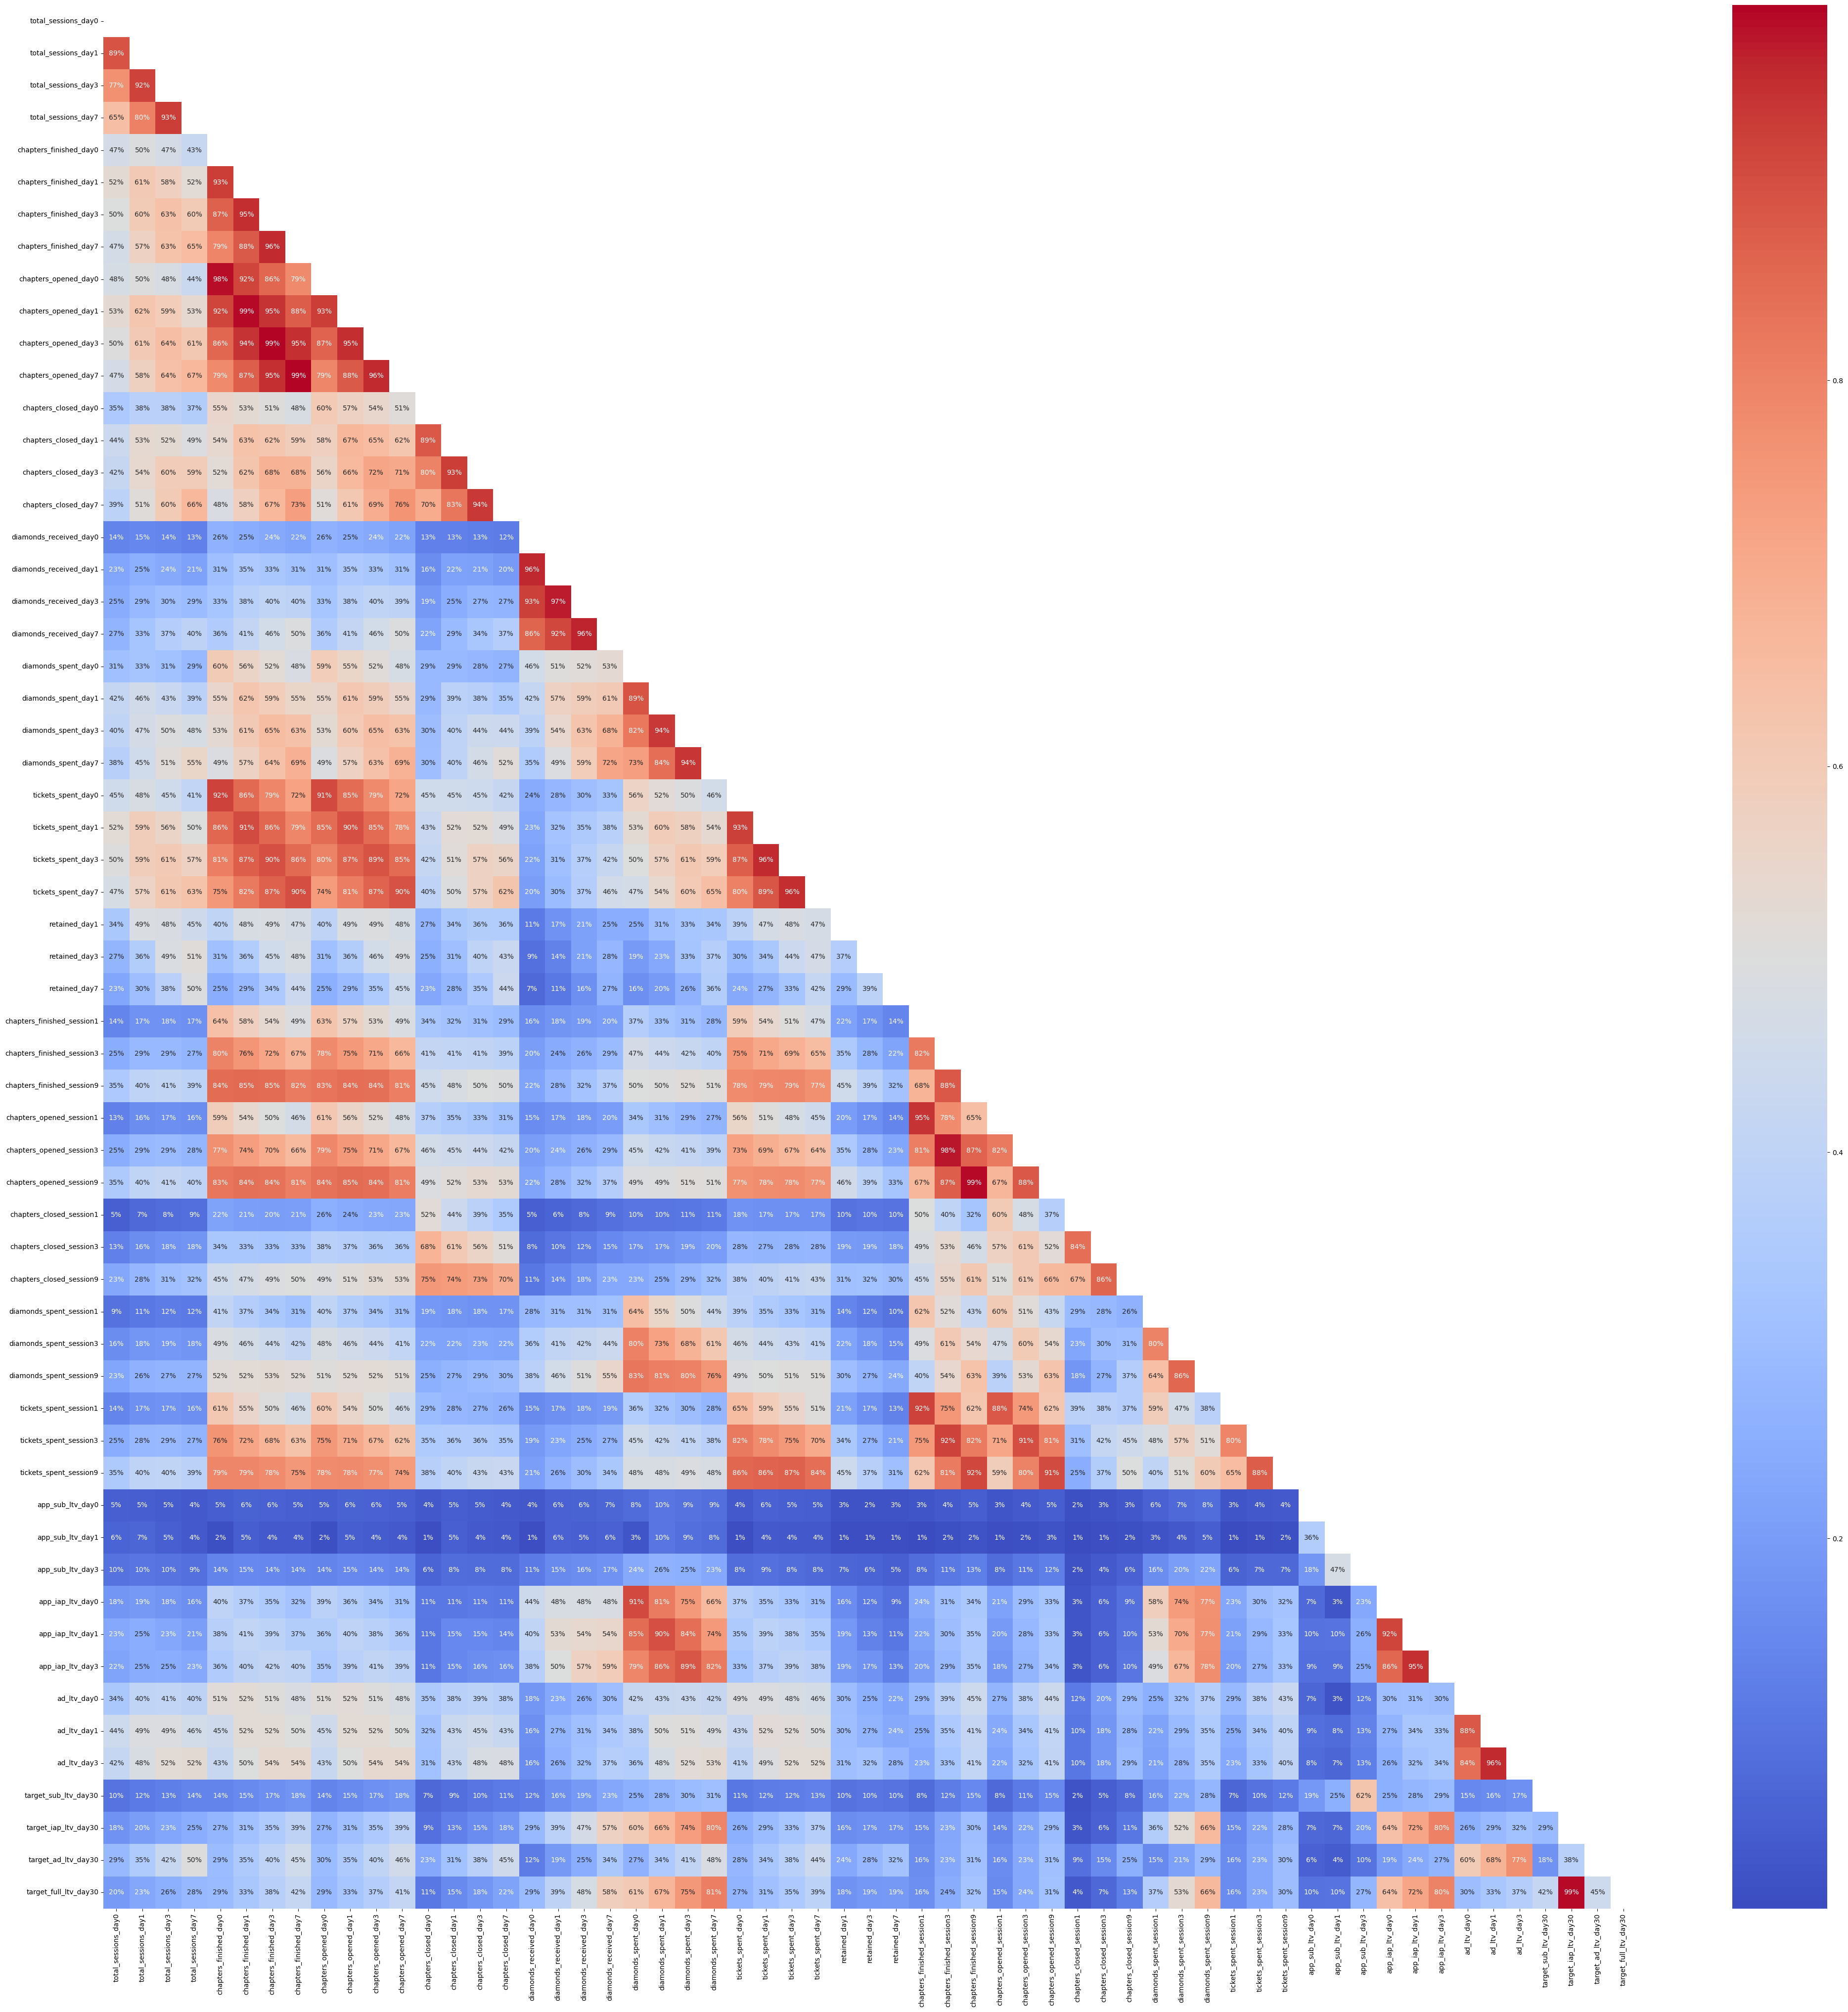

In [10]:
# plot correlation matrix of all features
plt.figure(figsize=(50,50))
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, fmt=".0%", mask=mask, cmap="coolwarm")
plt.savefig('correlation_matrinx.png')

Переглянути таблицю можна у файлі correlation_matrix.png  у більших деталях.

Можемо побачи сильну кореляцію фіч типу diamond_spent, app_iap_ltv (~70%) з таргетом (target_full_ltv_day30), а також помірну кореляцію фіч типу tickets_spent, chapter_opened, chapter_finished із таргетом (~35%).
Такий же тренд спостерігається для target_iap_ltv_day30.
Натомість target_ad_ltv_day30 має помірну кореляцію із total_sessions та chapter_opened/finished/closed_day блоками, високу кореляцію із ad_ltv.
target_sub_ltv_30d не має значної кореляції із якимись фічами, окрім як app_sup_ltv. Вище зазначені фічі скоріш за все несуть важливу інформації та гратимуть визначну роль для прознозування траргету. Для бізнесу є очевидним, що купівля (ну і їх витрата) кристалів, корелює з прибудток; оскільки розділи новел купуються, то чим більша їх кількість - тим більший шанс, що вони були придбані.


Також помітно, що підвищення кореляції відбувається "блоками" фіч (такі як *chapter_*, *diamonds_* і т.д.), що відповідають за одинакову метрику, проту за різні дні. Також бачимо сильну кореляцію між групами ticket_spent та chapter_opened/finished, diamond_spent та app_aip_ltv.

<AxesSubplot:>

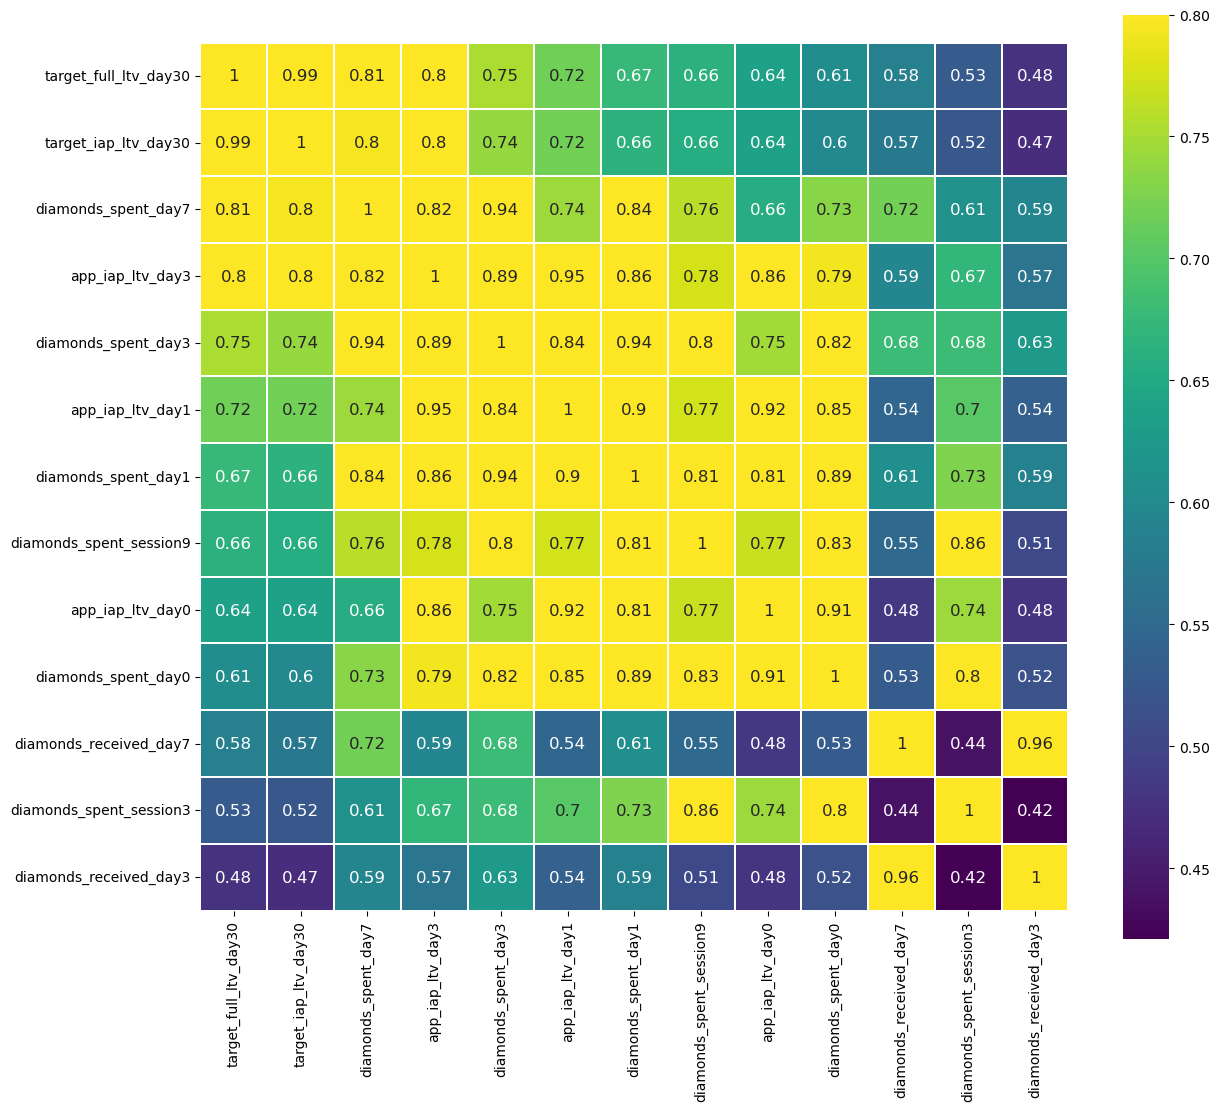

In [11]:
k = 13
# plot only k most correlates features
cols = corr.nlargest(k,'target_full_ltv_day30')['target_full_ltv_day30'].index
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

У нас майже функціональна залежність між таргетом та iap_ltv_day30, що означає, що основу частку з доходу одного користувача є залучення його ресурсів. Оскільки таргет скалдається із суми 3 параметрів: реклама, підписка, донати - то бізнесу варто знаходити різні підходи для користувачів. Наприклад, для людей схильних донатити, більш глибокі та тривалі новели, які будуть повертати їх назад та не переривати прцес рекламою. Іншим - данамічні новели, так, щоб частість виводу реклами не викликала дратуванн. Таким чином можна підвищити монетизацію.

В принципі бачимо, що найбільш корелюючі фічі є так чи інакше пов'язані із залучення ресурсі користувача.
З іншого боку ми пам'ятажмо, що основний дохід складає велика маса малоприбуткомих юзерів. Обидві категорії важливі, але оскільки 2 має більшу вагу, варто їх приділяти більше уваги.

<b>Висновки:</b>
Важливою інформацією із кореляційної матриці є те, що велика кількість фіч або не не корелює із таргетом або мають дуже подібний характер. З цього можна зробити припуження, що <b>наш багато вимірний датасет, можна представити у значно меншому вимірі</b> без значною втрати інформації та з достатньою точністю. (Як один із варіантів, можна замінити фічі одного характеру на їх суму, що зменший розмірність датасету).

## Categorical analysis

Пам'ятаємо, що ми залишили не дослідженеми наші категоріальні дані. Потенційно саме там можуть знаходитися певні інсайди або патерни, що полегшать нам передбачення результатів.

Розпочнемо із фічі MEDIA_SOURCE:

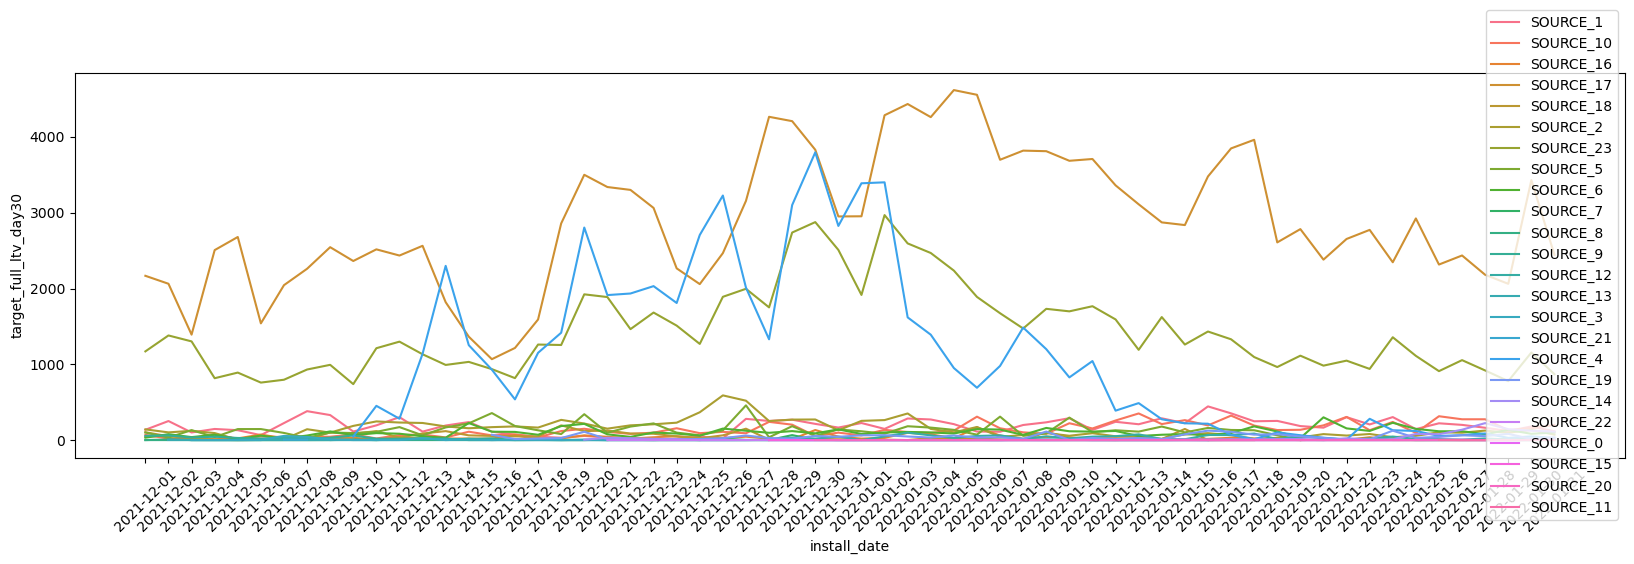

In [20]:
plt.figure(figsize=(20,5))
# group data by date and its media source
media_grouped = df.groupby(['install_date', 'media_source'])['target_full_ltv_day30'].sum()
media_grouped = media_grouped.reset_index(level=1)
# plot full ltv day30 for each media source
sns.lineplot(data=media_grouped, x='install_date', y='target_full_ltv_day30', hue='media_source')
plt.legend(loc=5)
plt.xticks(rotation=45)
plt.show()

Можемо помітити, що найбільшу та й головну частину прибутку ми отримуємо від 17, 23 та 4 MEDIA_SOURCE. В подальшому можна буде <b>розділити прибуткомі та не прибуткові джерела на два датасети</b> та навчати окремі моделі, для більш точного результату.

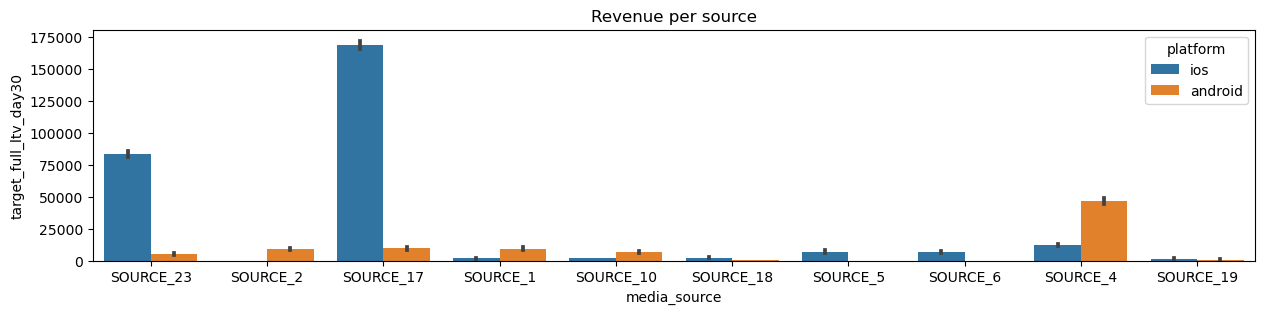

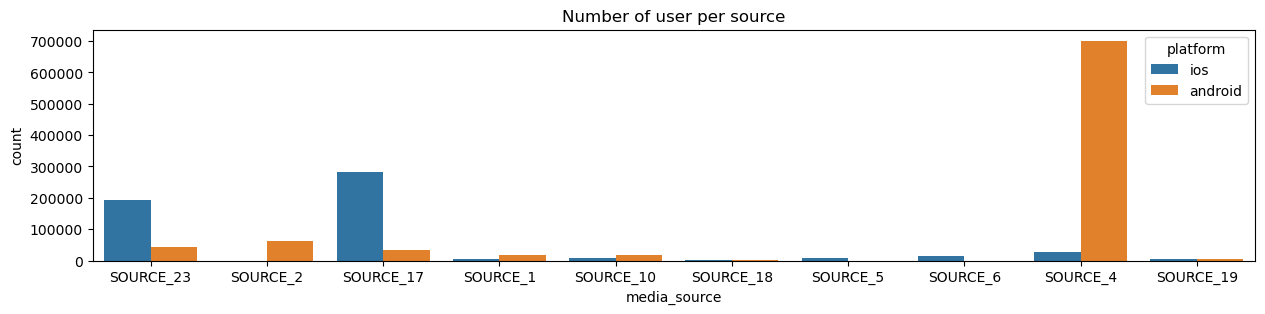

In [6]:
plt.figure(figsize=(15,3))

# top 10 sources by full ltv day30
top_sources = df.groupby('media_source')['target_full_ltv_day30'].sum().sort_values()[::-1][:10].index
platform_sorted = df[df['media_source'].isin(top_sources)]
# plot sum of full ltv day30 by source and platform
sns.barplot(data=platform_sorted, x='media_source', y='target_full_ltv_day30', hue='platform', estimator='sum')
plt.title('Revenue per source')
plt.show()

plt.figure(figsize=(15,3))
# plot number of user in each source by platform
sns.countplot(data=platform_sorted, x='media_source', hue='platform')
plt.title('Number of user per source')
plt.show()

Бачимо, що більша частина доходу у SOURCE_23 та SOURCE_17 приносять користувачі IOS, причому їх значно більше у своєму джерелі, а ніж користувачів Adroid. Протилежна ситуація із джерелом SOURCE_4, де переважна кількість користувачі Android. Хоч кільксть користувачі тут дійсно велика, вони не приносять так багато доходу, як користувачі 23 та 17 джерела. Решта джерел не приносять значних прибудків і не мають багато користувачів. Це також означає, що ці джерела залучають майже всіх користучів.

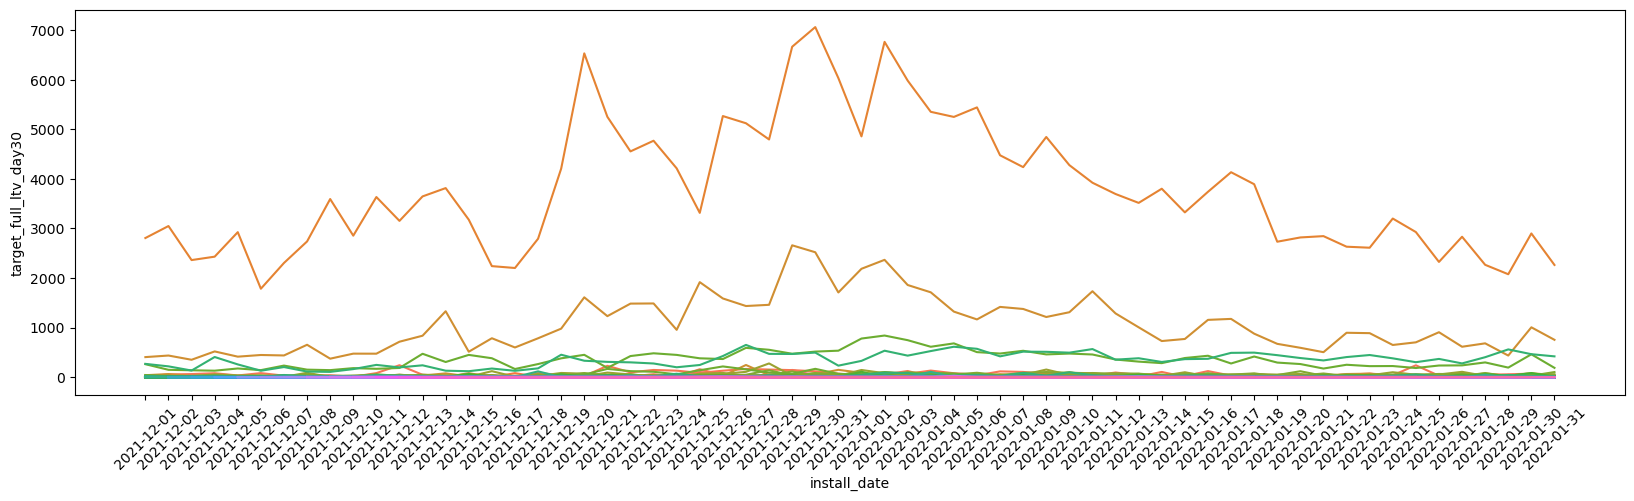

In [5]:
plt.figure(figsize=(20,5))
# group data by date and its country code
country_grouped = df.groupby(['install_date', 'country_code'])['target_full_ltv_day30'].sum()
country_grouped = country_grouped.reset_index(level=1)
# plot full ltv day30 for each country code 
sns.lineplot(data=country_grouped, x='install_date', y='target_full_ltv_day30', hue='country_code', legend=False)
plt.xticks(rotation=45)
plt.show()

Бачимо, що основний склад доходу прихосить COUNTRY_141, та трішки менше COUNTRY_155. Також помітними є COUNTRY_72 та COUNTRY_38. Решта наче не приносять значного доходу.

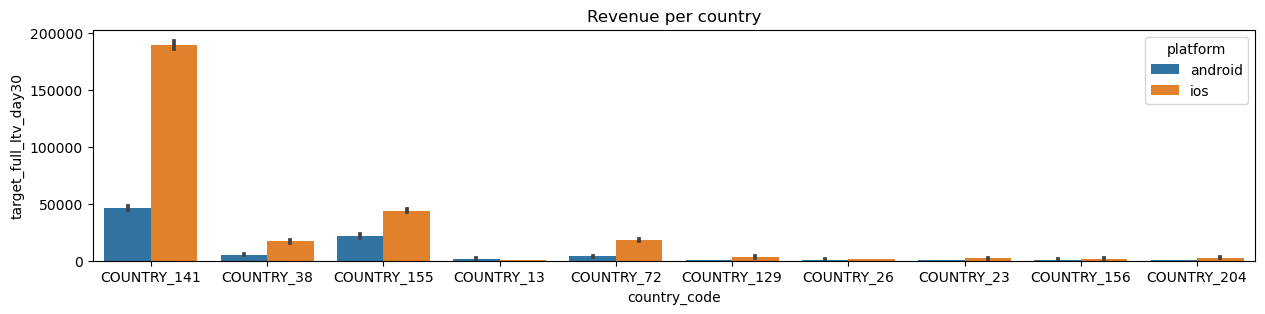

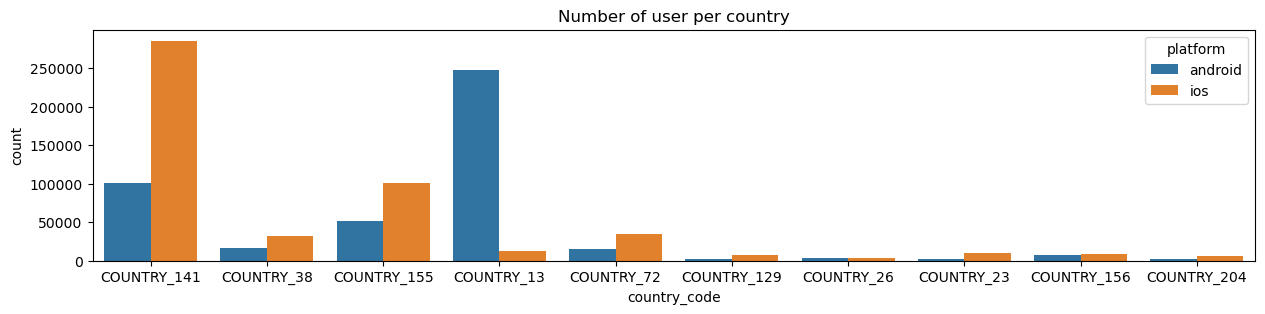

In [9]:
plt.figure(figsize=(15,3))

# top 10 sources by full ltv day30
top_county = df.groupby('country_code')['target_full_ltv_day30'].sum().sort_values()[::-1][:10].index
country_sorted = df[df['country_code'].isin(top_county)]
# plot sum of full ltv day30 by country and platform
sns.barplot(data=country_sorted, x='country_code', y='target_full_ltv_day30', hue='platform', estimator='sum')
plt.title('Revenue per country')
plt.show()

plt.figure(figsize=(15,3))
# plot number of user in each country by platform
sns.countplot(data=country_sorted, x='country_code', hue='platform')
plt.title('Number of user per ')
plt.show()

Бачимо велику кількість користувачів IOS у COUTNRY_141, що наштовхає на думку, що вона залучається джерелами MEDIA_SOURCE_17 або MEDIA_SOURCE_23. Зв'язок джерела та цікавих нам країн дослідимо згодом. Можемо помітити велику кількість користувачів Android із COUNTRY_13, проте вони не приносять значимого доходу, що потрбує досліду.

In [9]:
main_sources = df[df['media_source'].isin(['SOURCE_23', 'SOURCE_17', 'SOURCE_4'])]
main_sources['target_full_ltv_day30'].sum() / df['target_full_ltv_day30'].sum()

0.8623557870998697

In [30]:
df[df['country_code'] == 'COUNTRY_141']['target_full_ltv_day30'].sum() / df['target_full_ltv_day30'].sum()

0.6237360320666375

In [31]:
df[df['country_code'] == 'COUNTRY_155']['target_full_ltv_day30'].sum() / df['target_full_ltv_day30'].sum()

0.1735992451225905

Джерела 4, 17, 23 приносять 86% доходу. Країна 141 складає 62% доходу, країна 155 - 17%.

З графіку дохідності по країнам ми можемо спостерігати наявність зростаючого тренду у новорічний період, що немає у інших країнах. Це можливо тому, що ці країни перебувають в одному соціально-культурному полі. Оскіль на наші дані впливає період року, то доречним буде відділити ці країни та робито передбачення на двох окремих групах. Це також дорочено із того погляду, що вони приносять різні кількість доходів, що приносить більшу "нелінійність" у нашу задачу (данні більш варіаційні, що змушує модель шукати сильні не лінійні зв'язки).

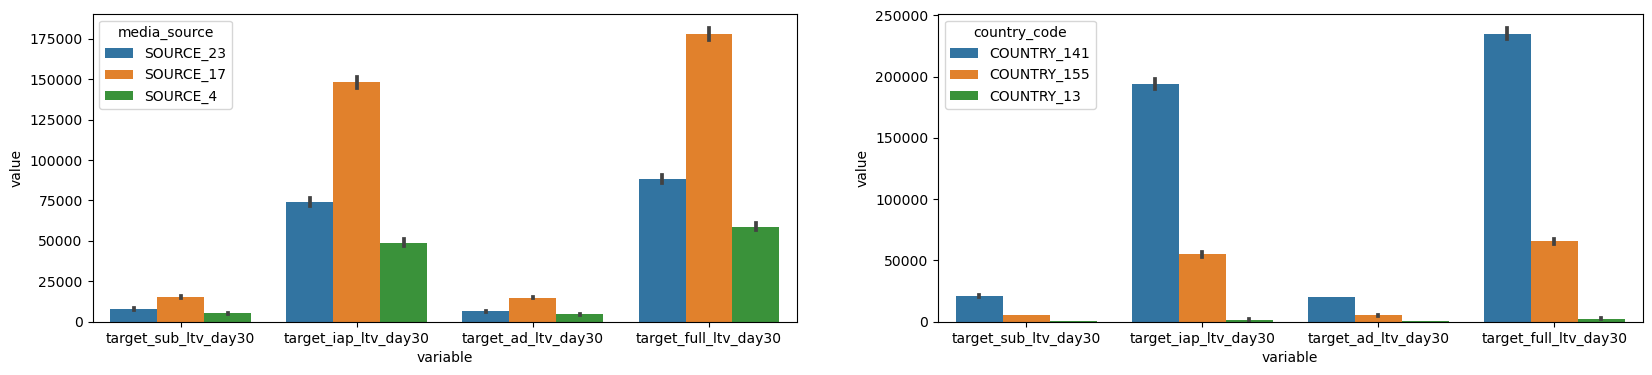

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20,4))
# plot revenue structed by 3 sources
sns.barplot(df_melt[df_melt['media_source'].isin(['SOURCE_17', 'SOURCE_4', 'SOURCE_23'])], x='variable', y='value', estimator='sum', hue='media_source', ax=ax[0])
# plot revenue structed by 3 countries
sns.barplot(df_melt[df_melt['country_code'].isin(['COUNTRY_141', 'COUNTRY_155', 'COUNTRY_13'])], x='variable', y='value', estimator='sum', hue='country_code', ax=ax[1])
plt.show()

Як бачимо на всіх цікавих джерелах та країнах зберігається тенденція, що внутрігні витрати у продукті складають головну частину доходу.

In [14]:
df['country_cluster'] = df['country_code'].isin(['COUNTRY_141', 'COUTRY_155']).astype(np.int16)
# drop install_date as we split in on year/month/day on start
df = df.drop('install_date', axis=1)
df.to_csv('eda_data.csv', index=False)

<b>Висновки:</b>
- у нас є 3 основні джерела по яким приходить прибуток (23, 17, 4)
- найбільше залучення йде через джерело 4, проте це дешеві користувачі Android, які не приносять багато прибутку (потенційно азіатський ринок). Значано менша кількість користувачі надходить від 17 (Північна Америка) та 23 (Європа/Австралія) джерела, проте це в більшості користувачі IOS, що приносять основний прибуток
- країна 141 є основним джерелом доходу (IOS), країна 155 також показує хороші результати
- розділили країни по їх трендам та доходам